In [1]:
from luwiji.knn import illustration, demo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
demo.knn()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=-5.0, desc…

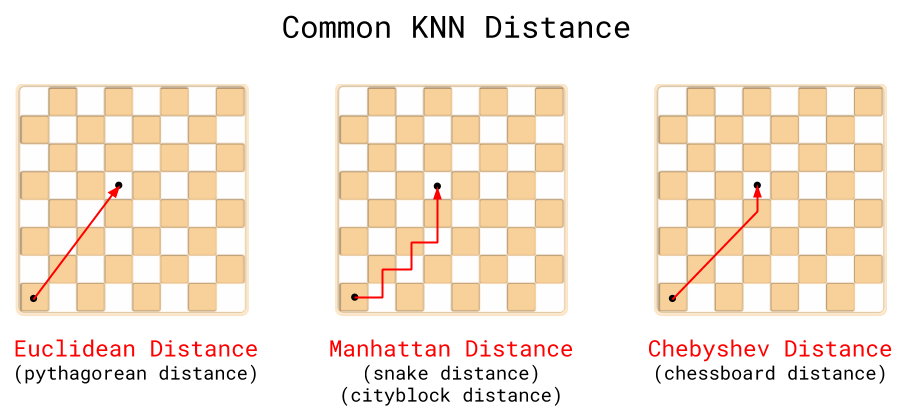

In [3]:
illustration.knn_distance

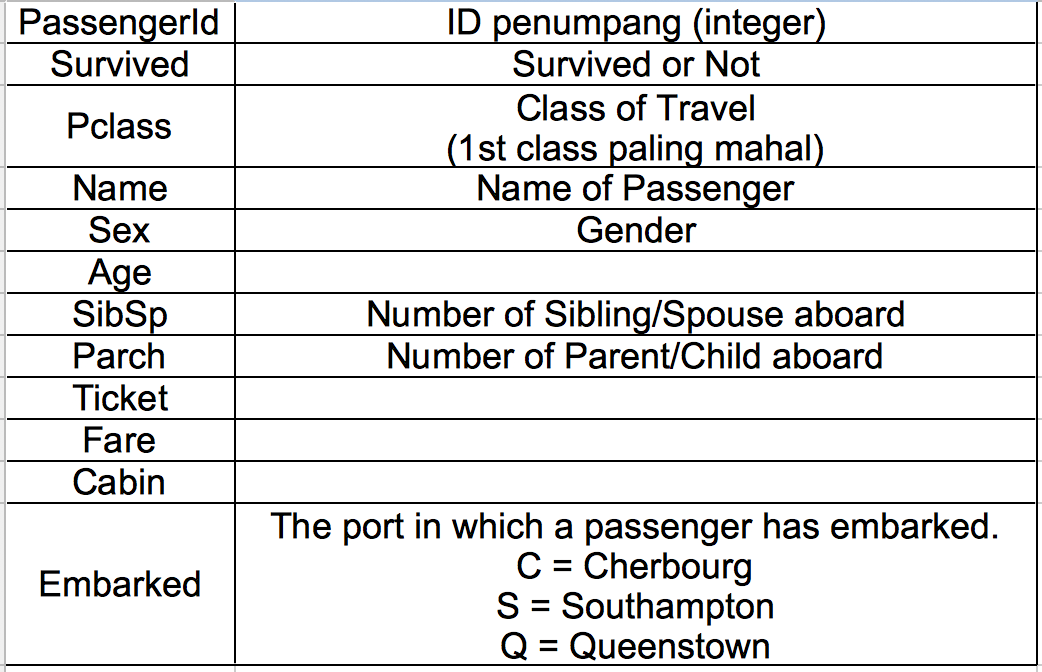

In [4]:
illustration.nomenklatur

In [5]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop(columns=["Name", "Ticket"], inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


# Quick Exploratory Data Analytics ( Quick EDA )

In [8]:
from jcopml.plot import plot_missing_value

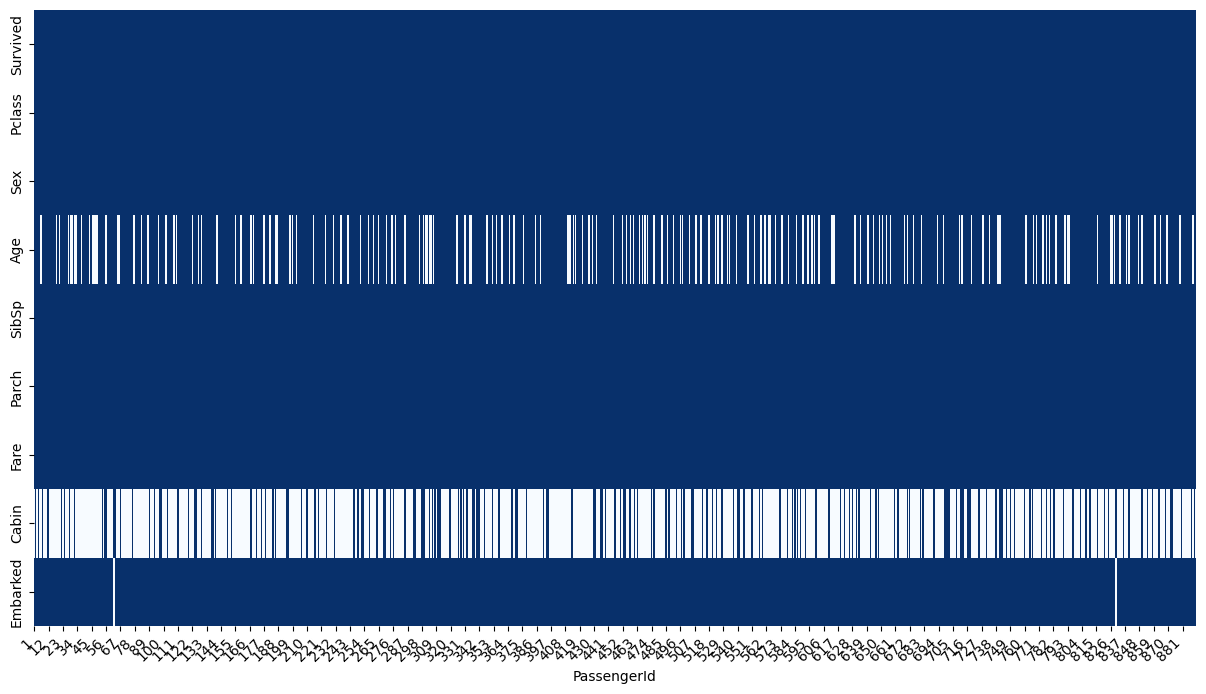

In [9]:
plot_missing_value(df)

In [10]:
df.drop(columns=["Age", "Cabin"], inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [12]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
df.fillna({"Embarked" : "S"}, inplace=True)

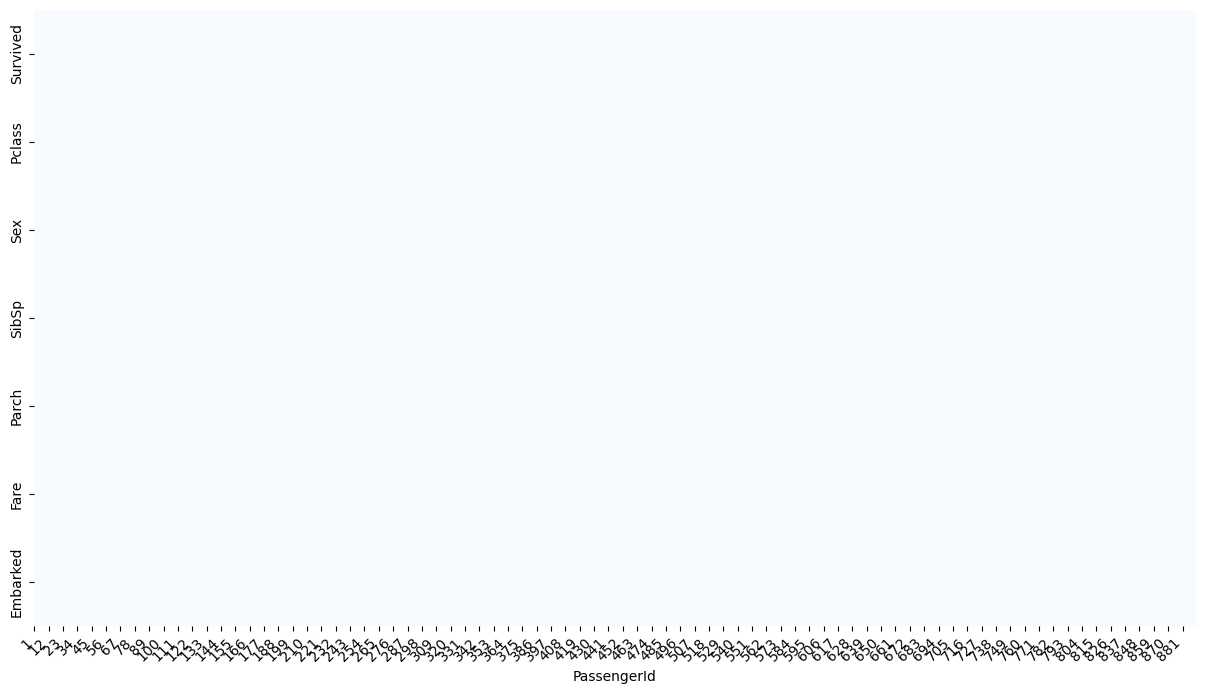

In [14]:
plot_missing_value(df)

# Persiapan Data

In [15]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [16]:
X = df.drop(columns="Survived")
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,False,False,True,False,True,False,False,True
2,1,0,71.2833,True,False,False,True,False,True,False,False
3,0,0,7.9250,False,False,True,True,False,False,False,True
4,1,0,53.1000,True,False,False,True,False,False,False,True
5,0,0,8.0500,False,False,True,False,True,False,False,True


# Scikit-learn

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [19]:
knn.score(X, y)

0.8383838383838383

# Dataset Splitting

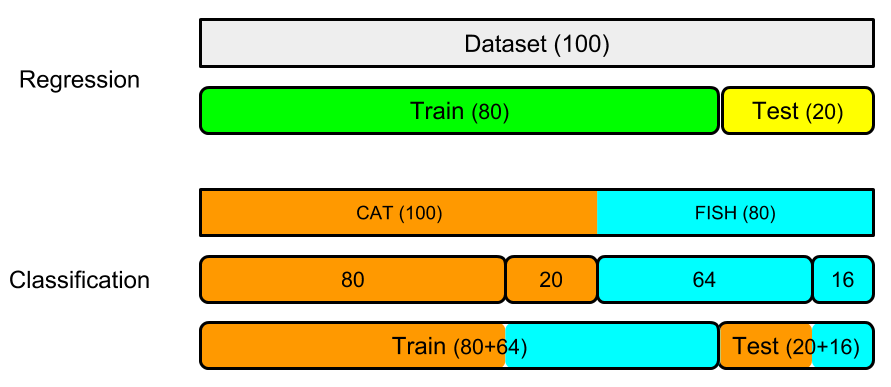

In [20]:
illustration.train_test_split

### Stratified Shuffle Split

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="Survived")
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.score(X_test, y_test)

0.6815642458100558

# K-fold Cross Validation

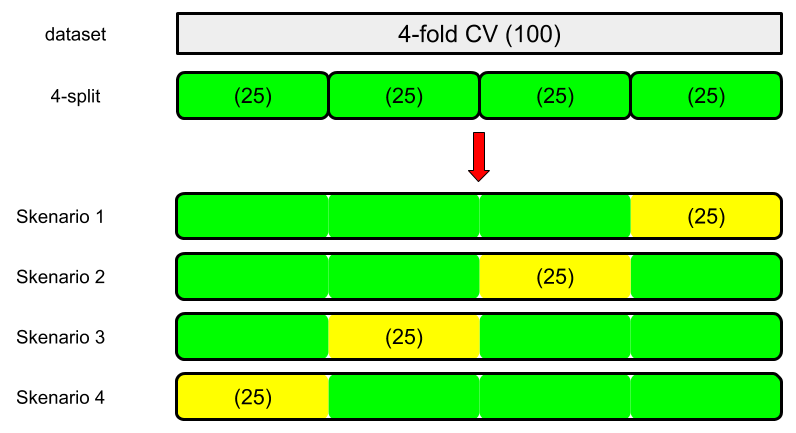

In [25]:
illustration.kfold_cv

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
cross_val_score(knn, X, y, cv=5).mean()

0.7307576423325592

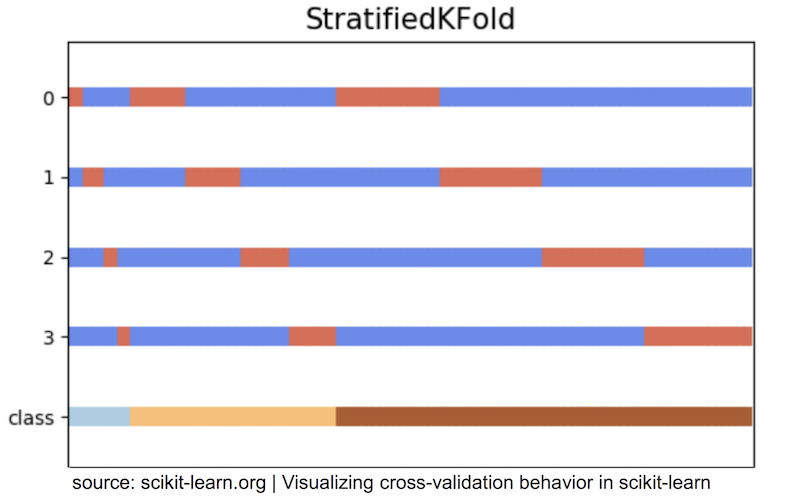

In [29]:
illustration.strat_kfold_cv

# Improvement melalui data : Feature Scalling

In [30]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

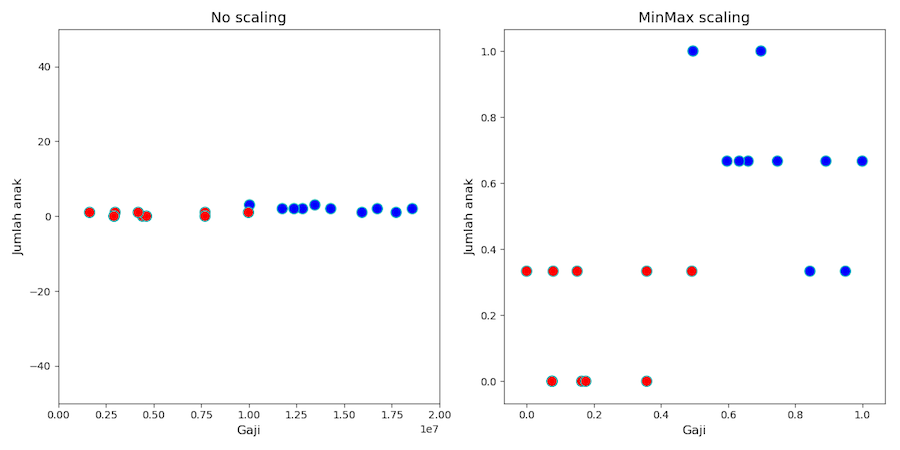

In [31]:
illustration.knn_scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [36]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9185393258426966, 0.7430167597765364)

# Improvement Melalui Model : Parameter Tunning

Max test Score : 0.7541899441340782
Max test Score : 3


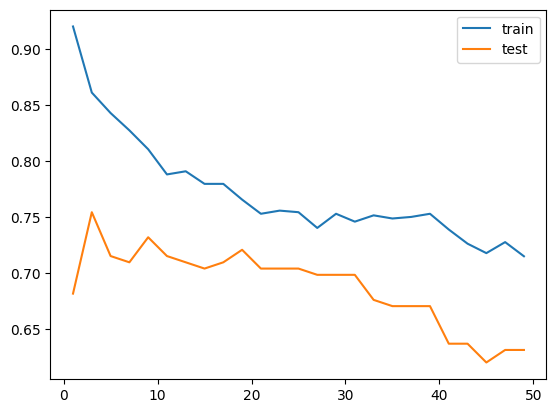

In [49]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []
for n in neighbor:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test Score : {np.max(test_score)}")
print(f"Max test Score : {neighbor[np.argmax(test_score)]}")

### Tunning N_neighbor dengan scalling

Max test Score : 0.7988826815642458
Max test Score : 29


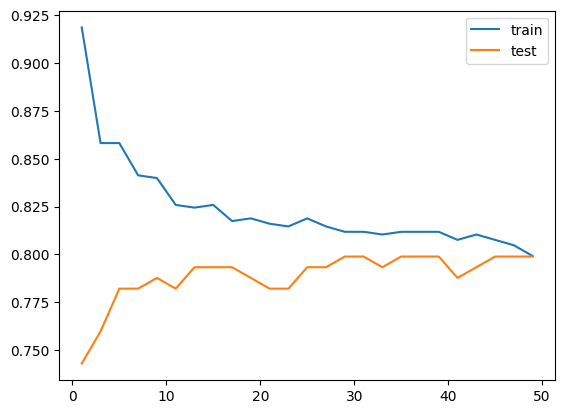

In [51]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []
for n in neighbor:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test Score : {np.max(test_score)}")
print(f"Max test Score : {neighbor[np.argmax(test_score)]}")

### Tunning N_neighbor dengan weight by distance

Max test Score : 0.7988826815642458
Max test Score : 49


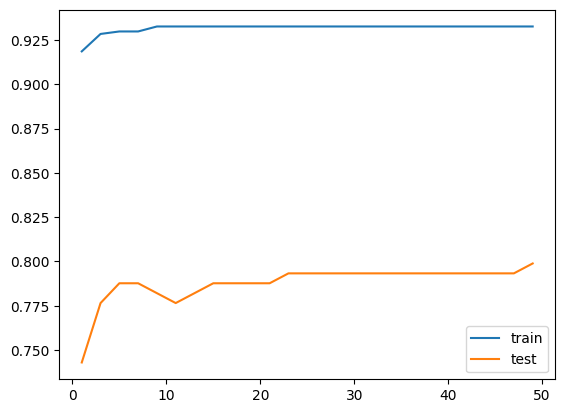

In [52]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []
for n in neighbor:
    knn = KNeighborsClassifier(n_neighbors=n, weights="distance")
    knn.fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test Score : {np.max(test_score)}")
print(f"Max test Score : {neighbor[np.argmax(test_score)]}")

### Tunning N_neighbor dengan weight by distance

Max test Score : 0.7932960893854749
Max test Score : 5


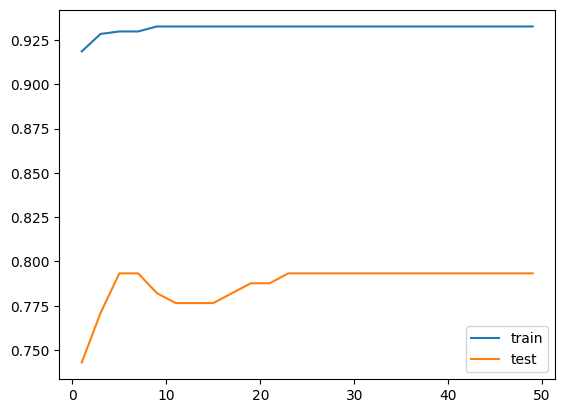

In [53]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []
for n in neighbor:
    knn = KNeighborsClassifier(n_neighbors=n, weights="distance", p=1)
    knn.fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test Score : {np.max(test_score)}")
print(f"Max test Score : {neighbor[np.argmax(test_score)]}")